CHAPTER 09 텍스트를 위한 인공신경망  
9-2 순환 신경망으로 IMDB 리뷰 분류하기  

In [73]:
# 데이터 불러오기(IMDB 리뷰)
from keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)

In [74]:
# 데이터 크기 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


[말뭉치 데이터가 1차원 배열인 이유]  
: IMDB 리뷰 텍스트의 길이는 제각각이므로 고정 크기의 2차원 배열에 담기보다  
리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [75]:
# 첫 번째 리뷰의 길이 출력
print(len(train_input[0]))

218


In [76]:
# 두 번째 리뷰의 길이 출력
print(len(train_input[1]))

189


In [77]:
# 첫 번째 리뷰의 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 케라스의 IMDB 리뷰 데이터는 이미 정수로 변환되어 있음  
- num_words=200이므로 어휘 사전에는 200개의 단어만 들어가 있음  
- 어휘 사전에 없는 단어는 모두 2로 표시됨  

[200단어 선정 기준]  
imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로  
나열한 다음 가장 많이 등장한 200개의 단어를 선택함  


In [78]:
# 타깃 데이터 출력 
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


리뷰가 긍정인지 부정인지 판단하는 이진 분류 문제  
0(부정), 1(긍정)

In [79]:
# 검증세트 나누기
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [80]:
# 각 리뷰 길이 배열
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [81]:
# 리뷰 길이 평균값과 중간값 구하기
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


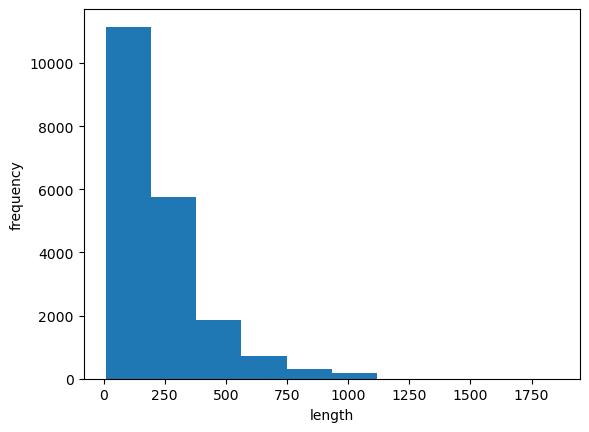

In [82]:
# lengths 배열 히스토그램으로 나타내가
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [83]:
# 시퀀스 데이터 길이 맞추기
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

pad_sequences() 함수  
: maxlen에 설정한 길이보다 길면 잘라내고 짧으면 0으로 패딩함

In [84]:
# train_seq 크기 확인
print(train_seq.shape)

(20000, 100)


In [85]:
# train_seq의 첫 번째 샘플 출력
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [86]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자름  
뒷부분을 잘라내고 싶다면 pad_sequences() 함수의 truncating 매개변수의 값을    
기본값 'pre'가 아닌 'post'로 바꿔줘야 함 
> 패딩 토큰도 앞부분에 추가됨

In [87]:
# train_seq의 여섯 번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [88]:
# 검증 세트 길이 100으로 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

In [89]:
# 순환 신경망 만들기
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8)) # SimpleRNN 클래스 사용, 뉴런 개수 지정
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [90]:
# 원-핫 인코딩 변환
train_oh = keras.utils.to_categorical(train_seq)

# 배열 크기 출력
print(train_oh.shape)

(20000, 100, 200)


In [91]:
# 첫 번째 샘플 인코딩 확인
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [92]:
# 모든 원소의 합이 1인지 확인
print(np.sum(train_oh[0][0]))

1.0


In [93]:
# 검증 세트 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [94]:
# 모델 구조 출력
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# 순환 신경망 훈련
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5002 - loss: 0.6981 - val_accuracy: 0.5430 - val_loss: 0.6889
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5643 - loss: 0.6819 - val_accuracy: 0.5754 - val_loss: 0.6749
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6302 - loss: 0.6494 - val_accuracy: 0.6340 - val_loss: 0.6451
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6646 - loss: 0.6243 - val_accuracy: 0.6906 - val_loss: 0.5994
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6925 - loss: 0.5963 - val_accuracy: 0.6964 - val_loss: 0.5936
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6935 - loss: 0.5924 - val_accuracy: 0.6842 - val_loss: 0.6041
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7067 - loss: 0.5773 - val_accuracy: 0.7080 - val_loss: 0.5770
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7162 - loss: 0.5671 - 

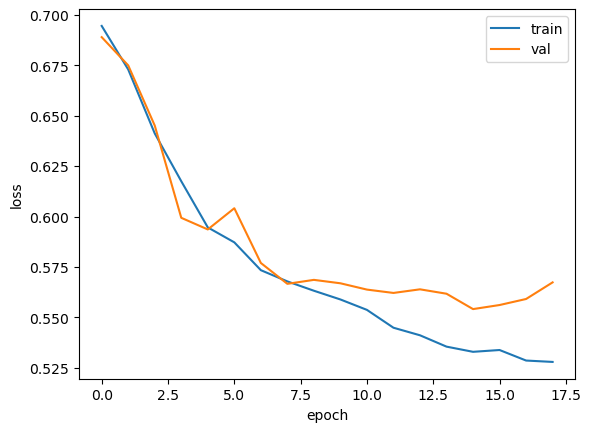

In [96]:
# 훈련 손실과 검증 손실 그래프로 그리기
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

[단어 임베딩]  
: 각 단어를 고정된 크기의 실수 벡터로 바꾸어줌  
: 입력으로 정수 데이터를 받는다는 장점이 있음
> 배열 크기 바꾸지 않아도 되고 메모리 절약


In [97]:
# 500단어 선택한 IMDB 데이터셋 준비
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
trian_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [98]:
# Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망 만들기
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500, 16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

In [99]:
# 모델 구조 출력
model_emb.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# 모델 훈련
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5377 - loss: 0.6862 - val_accuracy: 0.6452 - val_loss: 0.6339
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6784 - loss: 0.6063 - val_accuracy: 0.7028 - val_loss: 0.5807
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7006 - loss: 0.5854 - val_accuracy: 0.6998 - val_loss: 0.5760
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7127 - loss: 0.5632 - val_accuracy: 0.7018 - val_loss: 0.5779
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7162 - loss: 0.5627 - val_accuracy: 0.7038 - val_loss: 0.5678
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7103 - loss: 0.5619 - val_accuracy: 0.7162 - val_loss: 0.5577
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7298 - loss: 0.5444 - val_accuracy: 0.7016 - val_loss: 0.5704
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7157 - loss: 0.5531 -

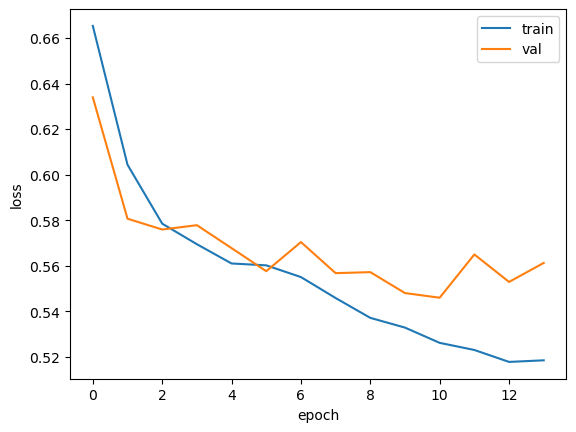

In [101]:
# 훈련 손실과 검증 손실을 그래프로 출력 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()